<a href="https://cognitiveclass.ai"><img src = "https://ibm.box.com/shared/static/9gegpsmnsoo25ikkbl4qzlvlyjbgxs5x.png" width = 400> </a>

<h1 align=center><font size = 5>Distribution of restaurants offering a specific cusine. </font></h1>
<h2 align=center><font size = 4>Notebook by André C. Baumann</font></h2>

## Introduction

A need arose to analyse a specifid area in Dublin 13 and explore the possibility of opening a restaurant.
It should be analysed which type of cusine any such restaurant would offer without undue competition from existing businesses in this area.

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Download all libraries needed</a>

2. <a href="#item2">Using geopy library to get locations</a>

3. <a href="#item3">Create a map of Dublin City</a>

4. <a href="#item4">Define cusine and distance</a>

5. <a href="#item5">Fetch results from FourSquare</a>

6. <a href="#item6">Create Dataframe</a>

7. <a href="#item7">Display results</a>

8. <a href="#item8">Analyse results</a>

9. <a href="#item9">Conclusion</a>
</font>
</div>

#### Download all libraries needed

In [8]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes
# used to convert an address into latitude and longitude
from geopy.geocoders import Nominatim 

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# import folium for Foursquare API
#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


#### Using geopy library to get the latitude and longitude values of Dublin City.

In [9]:
#In order to define an instance of the geocoder a user_agent is required.
address = 'Baldoyle, Ireland'
geolocator = Nominatim(user_agent="dub_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Dublin City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Dublin City are 53.3958303, -6.1285497.


#### Create a map of Dublin City

In [10]:
#folium.Map(location=[53.35, -6.26]
folium.Map(location=[latitude, longitude], zoom_start=15)

In [11]:
CLIENT_ID = 'HTMDZMXXZUW00NTYQWRCJETTS3C4GQF44ALMUD3VFY33SDIB' # your Foursquare ID
CLIENT_SECRET = 'SCHU3LIQDTJI0WSQK1DAIJWJVVOIQTAY1C1LHXW4FYK4S43R' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HTMDZMXXZUW00NTYQWRCJETTS3C4GQF44ALMUD3VFY33SDIB
CLIENT_SECRET:SCHU3LIQDTJI0WSQK1DAIJWJVVOIQTAY1C1LHXW4FYK4S43R


#### Define cusine and distance

In [12]:
german_query = 'german'
jap_query = 'japanese'
thai_query = 'thai'
chinese_query = 'chinese'
italian_query = 'italian'
radius = 10000
LIMIT = 10

#### Fetch results from FourSquare

In [13]:
german_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, german_query, radius, LIMIT)
jap_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, jap_query, radius, LIMIT)
thai_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, thai_query, radius, LIMIT)
chinese_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, chinese_query, radius, LIMIT)
italian_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, italian_query, radius, LIMIT)

In [14]:
german_results = requests.get(german_url).json()
jap_results = requests.get(jap_url).json()
thai_results = requests.get(thai_url).json()
chinese_results = requests.get(chinese_url).json()
italian_results = requests.get(italian_url).json()


##### Create Dataframe [German]

In [15]:
german_venues = german_results['response']['venues']

german_dataframe = json_normalize(german_venues)

german_filtered_columns = ['name', 'categories'] + [col for col in german_dataframe.columns if col.startswith('location.')] + ['id']
german_dataframe_filtered = german_dataframe.loc[:, german_filtered_columns]

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        
        return categories_list[0]['name']
    
german_dataframe_filtered['categories'] = german_dataframe_filtered.apply(get_category_type, axis=1) 
german_dataframe_filtered.columns = [column.split('.')[-1] for column in german_dataframe_filtered.columns]

print(german_dataframe_filtered['name'].head(3))
german_dataframe_filtered.head()

0    Embassy of The Federal Republic of Germany
1                            St. Paul's College
Name: name, dtype: object


,name,categories,address,lat,lng,labeledLatLngs,distance,cc,city,country,formattedAddress,postalCode,state,id
0,Embassy of The Federal Republic of Germany,Embassy / Consulate,31 Trimleston Ave,53.310647,-6.202923,"[{'label': 'display', 'lat': 53.31064702665502...",10692,IE,Booterstown,Ireland,"[31 Trimleston Ave, Booterstown, Ireland]",NaN,NaN,4d9b3ccd03d8721ef90ae324
1,St. Paul's College,High School,"Sybil Hill, Raheny",53.373195,-6.192255,"[{'label': 'display', 'lat': 53.37319526810253...",4923,IE,Dublin,Ireland,"[Sybil Hill, Raheny, Dublin, Dublin City, Irel...",5,Dublin City,4c6e42a1e6b7b1f7ff1eac8e


##### [Japanese]

In [16]:
jap_venues = jap_results['response']['venues']

jap_dataframe = json_normalize(jap_venues)

jap_filtered_columns = ['name', 'categories'] + [col for col in jap_dataframe.columns if col.startswith('location.')] + ['id']
jap_dataframe_filtered = jap_dataframe.loc[:, jap_filtered_columns]

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        
        return categories_list[0]['name']
jap_dataframe_filtered['categories'] = jap_dataframe_filtered.apply(get_category_type, axis=1) 

jap_dataframe_filtered.columns = [column.split('.')[-1] for column in jap_dataframe_filtered.columns]

print(jap_dataframe_filtered['name'].head(3))
jap_dataframe_filtered.head()

0    Han Sung Korean & Japanese Market
1                Japanese Kitchen @ J2
2                 Japanese Team's Crib
Name: name, dtype: object


,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,Han Sung Korean & Japanese Market,Supermarket,22 Great Strand St,53.346688,-6.264995,"[{'label': 'display', 'lat': 53.346687909417, ...",10585,1,IE,Dublin,Dublin City,Ireland,"[22 Great Strand St, Dublin, Dublin City, Irel...",4bae3353f964a5204f913be3
1,Japanese Kitchen @ J2,Sushi Restaurant,1 Poolbeg St,53.346897,-6.257115,"[{'label': 'display', 'lat': 53.34689683534879...",10128,2,IE,Dublin,Dublin City,Ireland,"[1 Poolbeg St, Dublin, Dublin City, Ireland]",542946bf498ef4e6e7b4afcc
2,Japanese Team's Crib,None,237 Clonliffe Rd,53.362922,-6.255062,"[{'label': 'display', 'lat': 53.36292249557323...",9164,NaN,IE,Dublin,Dublin City,Ireland,"[237 Clonliffe Rd, Dublin, Dublin City, Ireland]",4e4eb0e315203aaed65f393f
3,Banyi Japanese Dining,Japanese Restaurant,"3-4 Bedford Row, Temple Bar",53.345854,-6.261796,"[{'label': 'display', 'lat': 53.34585413275388...",10453,2,IE,Dublin,Dublin City,Ireland,"[3-4 Bedford Row, Temple Bar, Dublin, Dublin C...",51955e89498e30a47e57d4e0
4,Tani Japanese Takeaway,Japanese Restaurant,47A Phibsborough Rd,53.359455,-6.272808,"[{'label': 'display', 'lat': 53.359455, 'lng':...",10400,NaN,IE,Dublin,Dublin City,Ireland,"[47A Phibsborough Rd, Dublin, Dublin City, Ire...",5774218e498e184810adaff2


#### Fetch Results [Thai]

In [17]:
thai_venues = thai_results['response']['venues']

thai_dataframe = json_normalize(thai_venues)

thai_filtered_columns = ['name', 'categories'] + [col for col in thai_dataframe.columns if col.startswith('location.')] + ['id']
thai_dataframe_filtered = thai_dataframe.loc[:, thai_filtered_columns]

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        
        return categories_list[0]['name']
thai_dataframe_filtered['categories'] = thai_dataframe_filtered.apply(get_category_type, axis=1) 

thai_dataframe_filtered.columns = [column.split('.')[-1] for column in thai_dataframe_filtered.columns]

print(thai_dataframe_filtered['name'].head(3))
thai_dataframe_filtered.head()

0    Thai-Ireland Temple (วัดไทย-ไอร์แลนด์) (Thai-I...
1                                     Thai Well Centre
2                                      Thai Palace Inn
Name: name, dtype: object


,name,categories,address,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,postalCode,id
0,Thai-Ireland Temple (วัดไทย-ไอร์แลนด์) (Thai-I...,Buddhist Temple,Castle Ave,53.456466,-6.215664,"[{'label': 'display', 'lat': 53.456466, 'lng':...",8885,IE,Swords,Co Dublin,Ireland,"[Castle Ave, Swords, Co Dublin, Ireland]",NaN,589f34d5bbec664e9e47af4d
1,Thai Well Centre,Spa,53 Ranelagh,53.324550,-6.253268,"[{'label': 'display', 'lat': 53.32455017067806...",11472,IE,Dublin,Dublin City,Ireland,"[53 Ranelagh, Dublin, Dublin City, Ireland]",6,4ec7d5070e017e2f9a4d27ea
2,Thai Palace Inn,Thai Restaurant,99 Monkstown Rd,53.290437,-6.164446,"[{'label': 'display', 'lat': 53.29043730396196...",11972,IE,Dublin,NaN,Ireland,"[99 Monkstown Rd, Dublin, Ireland]",NaN,5726b68f498e338923a80550
3,Thai Spice,Thai Restaurant,3A Talbot Pl,53.351012,-6.251301,"[{'label': 'display', 'lat': 53.35101230587295...",9557,IE,Dublin,Dublin City,Ireland,"[3A Talbot Pl, Dublin, Dublin City, Ireland]",1,4b4c956cf964a520bfb626e3
4,Siam Thai,Thai Restaurant,1 The Green,53.452138,-6.153222,"[{'label': 'display', 'lat': 53.45213823832883...",6478,IE,Malahide,NaN,Ireland,"[1 The Green, Malahide, Ireland]",NaN,4b2cf82af964a52080cb24e3


#### Fetch Results [Chinese]

In [18]:
chinese_venues = chinese_results['response']['venues']

chinese_dataframe = json_normalize(chinese_venues)

chinese_filtered_columns = ['name', 'categories'] + [col for col in chinese_dataframe.columns if col.startswith('location.')] + ['id']
chinese_dataframe_filtered = chinese_dataframe.loc[:, chinese_filtered_columns]

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        
        return categories_list[0]['name']
chinese_dataframe_filtered['categories'] = chinese_dataframe_filtered.apply(get_category_type, axis=1) 

chinese_dataframe_filtered.columns = [column.split('.')[-1] for column in chinese_dataframe_filtered.columns]

print(chinese_dataframe_filtered['name'].head(3))
chinese_dataframe_filtered.head()

0    Hilan Korean & Chinese Restaurant
1               Chinese Fastfood 金粒王快餐
2                    Park Lane Chinese
Name: name, dtype: object


,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,Hilan Korean & Chinese Restaurant,Korean Restaurant,45 Capel St,53.348661,-6.268820,"[{'label': 'display', 'lat': 53.34866097636511...",10693,1,IE,Dublin,Dublin City,Ireland,"[45 Capel St, Dublin, Dublin City, Ireland]",4b26b074f964a5208c7f24e3
1,Chinese Fastfood 金粒王快餐,Chinese Restaurant,17 Moore St,53.350587,-6.262679,"[{'label': 'display', 'lat': 53.35058654165143...",10233,1,IE,Dublin,Dublin City,Ireland,"[17 Moore St, Dublin, Dublin City, Ireland]",4f205b48e4b0bf85e37ca3f6
2,Park Lane Chinese,Chinese Restaurant,NaN,53.402996,-6.157716,"[{'label': 'display', 'lat': 53.402996, 'lng':...",2093,NaN,IE,NaN,NaN,Ireland,[Ireland],4bddd3aa587b2d7f7a3d5509
3,The Plaza Chinese Restaurant,Asian Restaurant,plaza,53.456745,-6.220423,"[{'label': 'display', 'lat': 53.45674502023085...",9116,NaN,IE,Swords,Co Dublin,Ireland,"[plaza, Swords, Co Dublin, Ireland]",4c0bdc6affb8c9b69fda6d61
4,Good Fortune Chinese,Chinese Restaurant,Greendale Shopping Centre,53.385095,-6.153266,"[{'label': 'display', 'lat': 53.38509453909667...",2029,5,IE,Dublin,Dublin City,Ireland,"[Greendale Shopping Centre, Dublin, Dublin Cit...",4f22c1a0c2ee23b9ebf03869


#### Fetch Results [Italian]

In [19]:
italian_venues = italian_results['response']['venues']

italian_dataframe = json_normalize(italian_venues)

italian_filtered_columns = ['name', 'categories'] + [col for col in italian_dataframe.columns if col.startswith('location.')] + ['id']
italian_dataframe_filtered = italian_dataframe.loc[:, italian_filtered_columns]

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        
        return categories_list[0]['name']
italian_dataframe_filtered['categories'] = italian_dataframe_filtered.apply(get_category_type, axis=1) 

italian_dataframe_filtered.columns = [column.split('.')[-1] for column in italian_dataframe_filtered.columns]

print(italian_dataframe_filtered['name'].head(3))
italian_dataframe_filtered.head()

0                   Toscana Italian Restaurant
1     Il Fornaio - Italian Restaurant & Bakery
2    Fabio's Traditional Italian Pizza & Pasta
Name: name, dtype: object


,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,Toscana Italian Restaurant,Italian Restaurant,3 Cork Hill,53.344078,-6.267482,"[{'label': 'display', 'lat': 53.34407803814191...",10878,2,IE,Dublin,Dublin City,Ireland,"[3 Cork Hill, Dublin, Dublin City, Ireland]",NaN,4b6d7612f964a520e1752ce3
1,Il Fornaio - Italian Restaurant & Bakery,Italian Restaurant,"55 Killbarrick Rd, Sutton",53.386872,-6.147377,"[{'label': 'display', 'lat': 53.38687225939918...",1598,13,IE,Dublin,Dublin City,Ireland,"[55 Killbarrick Rd, Sutton, Dublin, Dublin Cit...",NaN,4b20ec60f964a520633524e3
2,Fabio's Traditional Italian Pizza & Pasta,Italian Restaurant,"4 Malahide Rd, Coolock",53.387542,-6.200993,"[{'label': 'display', 'lat': 53.38754200375028...",4896,5,IE,Dublin,Dublin City,Ireland,"[4 Malahide Rd, Coolock, Dublin, Dublin City, ...",NaN,4f22be7ec2ee23b9ebefc824
3,Cucinos Italian Restaurant,Italian Restaurant,Sutton Cross,53.388702,-6.110873,"[{'label': 'display', 'lat': 53.388702, 'lng':...",1416,NaN,IE,Sutton,Dublin City,Ireland,"[Sutton Cross, Sutton, Dublin City, Ireland]",NaN,58a4a447abc6d66a25f4de52
4,The Italian Kitchen,Italian Restaurant,Stockhole Ln,53.411629,-6.218208,"[{'label': 'display', 'lat': 53.41162948138638...",6204,NaN,IE,Dublin,Dublin City,Ireland,"[Stockhole Ln, Dublin, Dublin City, Ireland]",NaN,5a5c91055455b2768becafd5


#### Display results

In [20]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13)

folium.features.CircleMarker(
    [latitude, longitude],
    radius=12,
    color='orange',
    popup='Baldoyle',
    fill = True,
    fill_color = 'orange',
    fill_opacity = 0.6
).add_to(venues_map)

# German cusine black
for lat, lng, label in zip(german_dataframe_filtered.lat, german_dataframe_filtered.lng, german_dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='black',
        popup=label,
        fill = True,
        fill_color='black',
        fill_opacity=0.6
    ).add_to(venues_map)
    
# add the Japanese restaurants as blue circle markers
for lat, lng, label in zip(jap_dataframe_filtered.lat, jap_dataframe_filtered.lng, jap_dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map)
    
# add the Thai restaurants as blue circle markers
for lat, lng, label in zip(thai_dataframe_filtered.lat, thai_dataframe_filtered.lng, thai_dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)
    
# add the Chinese restaurants as blue circle markers
for lat, lng, label in zip(chinese_dataframe_filtered.lat, chinese_dataframe_filtered.lng, chinese_dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='yellow',
        popup=label,
        fill = True,
        fill_color='yellow',
        fill_opacity=0.6
    ).add_to(venues_map)
    
# Italian cusine magenta
for lat, lng, label in zip(italian_dataframe_filtered.lat, italian_dataframe_filtered.lng, italian_dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='magenta',
        popup=label,
        fill = True,
        fill_color='magenta',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

#### Analyse the results

In [21]:
german_dataframe_filtered['type'] = 'german'
jap_dataframe_filtered['type'] = 'japanese'
thai_dataframe_filtered['type'] = 'thai'
chinese_dataframe_filtered['type'] = 'chinese'
italian_dataframe_filtered['type'] = 'italian'

AllRes = pd.DataFrame()
AllRes = pd.concat([german_dataframe_filtered, jap_dataframe_filtered, thai_dataframe_filtered, chinese_dataframe_filtered, italian_dataframe_filtered], sort=True)
AllResList = AllRes[['name','distance', 'type','id']]
AllResList.groupby('type').count()

,name,distance,id
type,,,
chinese,10,10,10
german,2,2,2
italian,10,10,10
japanese,7,7,7
thai,10,10,10


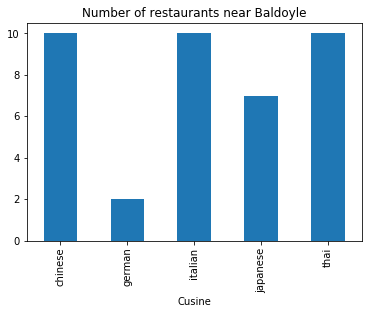

In [24]:
import matplotlib.pyplot as plt
AllResList.groupby('type')['name'].count().plot(kind = 'bar')

plt.title('Number of restaurants near Baldoyle')
plt.xlabel('Cusine')
plt.show()


The average distance of a given restaurant is type
chinese      7299.600000
german       7807.500000
italian      7208.800000
japanese    10329.857143
thai         8646.700000
Name: distance, dtype: float64.


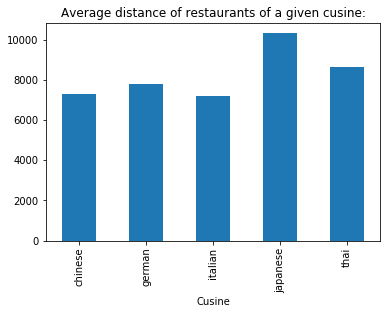

In [23]:
avgDis = AllResList.groupby('type')['distance'].mean()
print('The average distance of a given restaurant is {}.'.format(avgDis))

avgDis.plot(kind = 'bar')
plt.title('Average distance of restaurants of a given cusine:')
plt.xlabel('Cusine')
plt.show()

#### Conclusion

In conclusion of this mini project it can be argued to open a restaurant that offers german cusine in Baldoyle based on the complete absence of existing competition.  

<a id='item1'></a>

<hr>

Copyright &copy; 2018 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).

This notebook is part of a course on **Coursera** called *Applied Data Science Capstone*. If you accessed this notebook outside the course, you can take this course online by clicking [here](http://cocl.us/DP0701EN_Coursera_Week3_LAB2).

### Thank you for checking this out!
